> ## **신발가게 매출을 보면 경제 흐름을 알 수 있다**.
* 경제가 어려워지면 소비자들은 지출을 줄이고, 특히 고급 신발보다는 저렴한 신발로 대체하는 경향이 있지. 반대로 경기가 좋아지면 고급 브랜드 신발이나 비싼 운동화 판매가 증가하는 경향이 있고.

> ## **립스틱 판매 지수가 경제 지표가 될 수 있다**
* 경제가 나빠질 수록 소비자들이 큰 소비는 줄이지만, 상대적으로 저렴한 사치품(립스틱 같은 제품)을 구매하는 경향이 있다

*과연 사실일까? 한번 알아보자*

In [ ]:
# 1. Google Drive 마운트
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. CSV 파일 로드 및 확인
import pandas as pd

# CSV 파일 경로 (실제 파일 경로로 수정 필요!)
file_path = '/content/drive/MyDrive/DAT_데이터분석스터디/[2주차]시계열분석1_레포트.csv'

# CSV 파일 로드
df = pd.read_csv(file_path, header=None, names=["year", "kind_of_business", "total_sales", "prev_year_sales", "growth_rate"])

# 데이터 확인
print(df.head())  # 처음 5개 행 출력


         year  kind_of_business  total_sales  prev_year_sales  growth_rate
0  sales_year  kind_of_business  total_sales  prev_year_sales  growth_rate
1        2015   Clothing stores       374298              NaN          NaN
2        2016   Clothing stores       379864           374298          1.5
3        2017   Clothing stores       381592           379864          0.5
4        2018   Clothing stores       389446           381592          2.1


In [ ]:
# 3. 데이터 전처리 (NaN 제거 및 숫자 변환)
print(df.isnull().sum())

# 성장률이 없는 첫 해 데이터(NaN) 제거
df = df.dropna(subset=["growth_rate"])

# 데이터 타입 변환 (연도 및 성장률을 숫자로 변환)
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["growth_rate"] = pd.to_numeric(df["growth_rate"], errors="coerce")

# 데이터 확인
print(df.info())  # 데이터 타입 확인
print()
print('-------------------------')
print()
print(df.head())  # 변환된 데이터 미리보기

year                1
kind_of_business    0
total_sales         0
prev_year_sales     0
growth_rate         1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2 to 30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              25 non-null     float64
 1   kind_of_business  25 non-null     object 
 2   total_sales       25 non-null     object 
 3   prev_year_sales   25 non-null     object 
 4   growth_rate       25 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.2+ KB
None

-------------------------

     year kind_of_business total_sales prev_year_sales  growth_rate
2  2016.0  Clothing stores      379864          374298          1.5
3  2017.0  Clothing stores      381592          379864          0.5
4  2018.0  Clothing stores      389446          381592          2.1
5  2019.0  Clothing stores      384266          389446         -1.3
6  2020.0  Clothing stores

<ipython-input-6-aee26cbfbaaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = pd.to_numeric(df["year"], errors="coerce")
<ipython-input-6-aee26cbfbaaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_rate"] = pd.to_numeric(df["growth_rate"], errors="coerce")


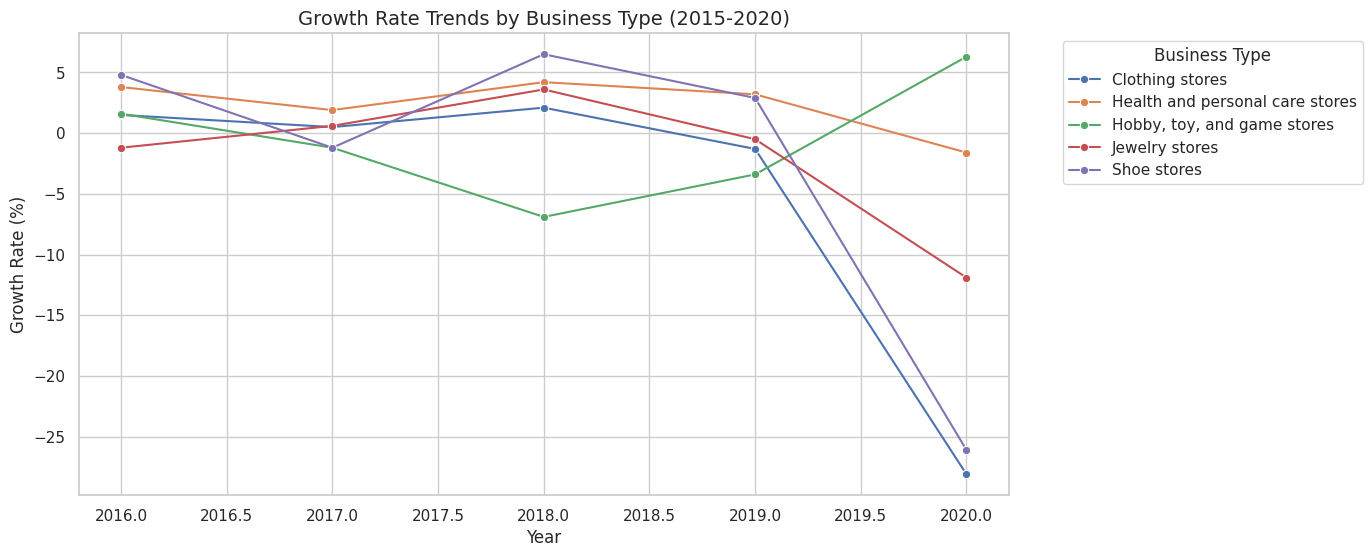

In [ ]:
# 4. 성장률 추세 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 사이즈 설정
plt.figure(figsize=(12, 6))

# 성장률 추세 그래프 그리기
sns.lineplot(data=df, x="year", y="growth_rate", hue="kind_of_business", marker="o")

# 그래프 제목 및 레이블 설정
plt.title("Growth Rate Trends by Business Type (2015-2020)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.legend(title="Business Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# 그래프 출력
plt.show()

# 분석 결과


1.   의류 시장
* 의류 시장을 분석에 포함한 이유는, 의류 또한 립스틱과 같은 저렴한 사치품으로 여겨지는 경우도 종종 있기에 함께 분석해봤다. (+ 화장품으로 명확하게 구분되는 카테고리가 없기도 했음) 하지만 예상과는 다르게 신발 시장과 동일하게 매출이 급락하는 경향을 보여주었다.
* 사람들이 경제 불확실성 속에서 패션 관련 소비를 줄였다는 신호로 해석이 가능하다.

2.   건강 및 개인 관리 매장
* 다른 업종과 달리 비교적 안정적인 하락세를 보였다.
* 경기 불황과 상관없이 필수제 중심이기 때문
(사실 해당 카테고리가 화장품이 포함될 수 있는 가장 연관성이 높은 카테고리였어서 립스틱 지수 처럼 소폭 상승할 것이라 예상했는데, 그와 다르게 소폭 하락세를 보여주었다)

3. 취미, 장난감, 게임 매장
* 다른 소비재와 달리 오히려 반등한 모습을 보였다.
* 사람들이 집에서 보내는 시간이 많아지면서 취미 및 실내 활동 관련 소비가 증가한것으로 해석할 수 있다.

4. 보석 매장
* 저렴한 사치품인 립스틱과 상반되는 개념으로 보석을 분석에 추가하였고, 예상했던 것과 동일하게 고급 사치제이기 때문에 소비가 감소하는 경항을 볼 수 있었다.


